### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')
print(len(data))

12684


In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
missing_data = data.isnull().sum()


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# drop unnecessary columns and missing data
data_rev= data.drop(columns=['car'])

#correct the column name
data_rev = data_rev.rename(columns={'passanger': 'passenger'})
data_rev.isnull().sum()


,0
destination,0
passenger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
total_customers = len(data_rev)
num_accepted_coupon = (data_rev['Y'] == 1).sum()
coupon_acceptance_rate = num_accepted_coupon/total_customers * 100

#The f before the string allows placeholders inside {} to be evaluated.
print(f"The coupon acceptance rate is {coupon_acceptance_rate:.2f}%")


The coupon acceptance rate is 56.84%


5. Use a bar plot to visualize the `coupon` column.

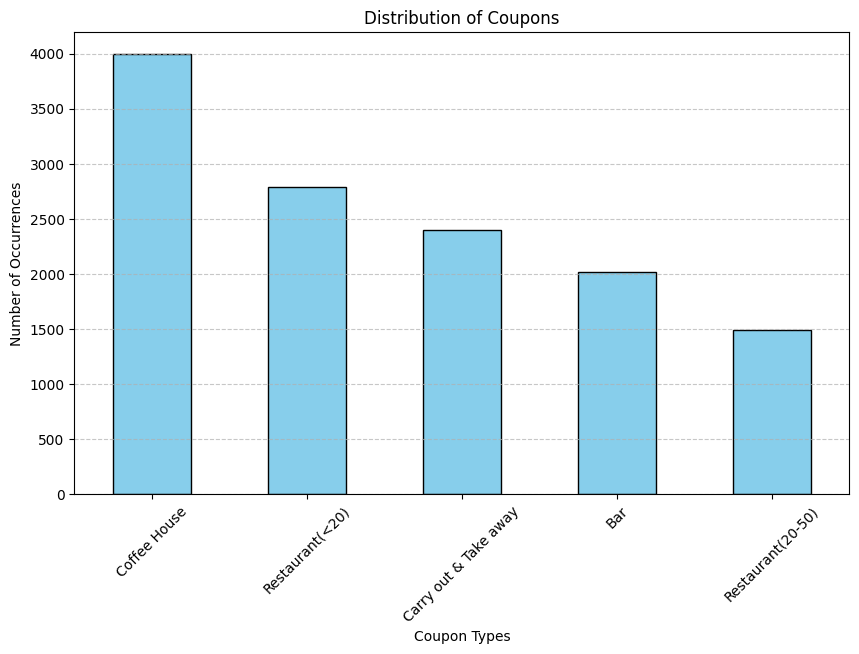

In [ ]:
coupon_counts = data_rev['coupon'].value_counts()
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Coupon Types')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Coupons')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.savefig('images/Distribution of Coupons.png')

6. Use a histogram to visualize the temperature column.

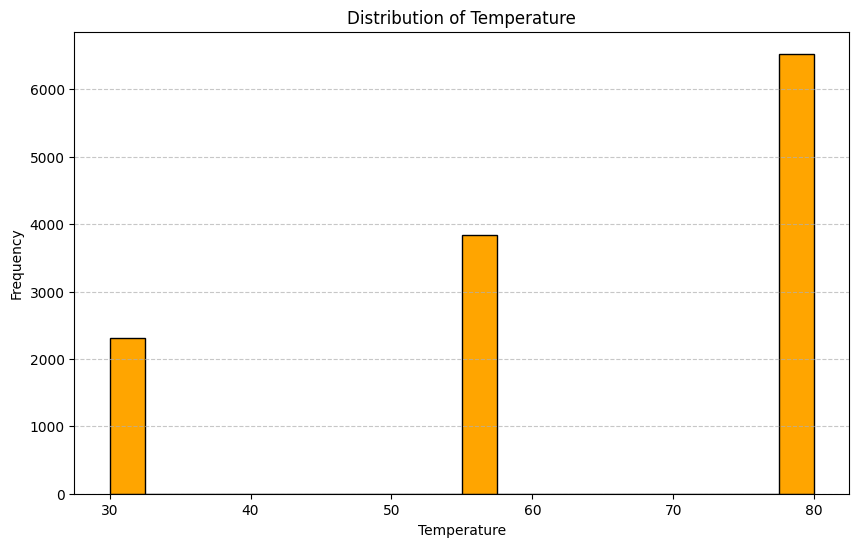

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data_rev['temperature'].dropna(), bins=20, color='orange', edgecolor='black')  # Drop NaN values for a clean histogram
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('images/Distribution of Temperature.png')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coupons_df = data_rev[data_rev['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


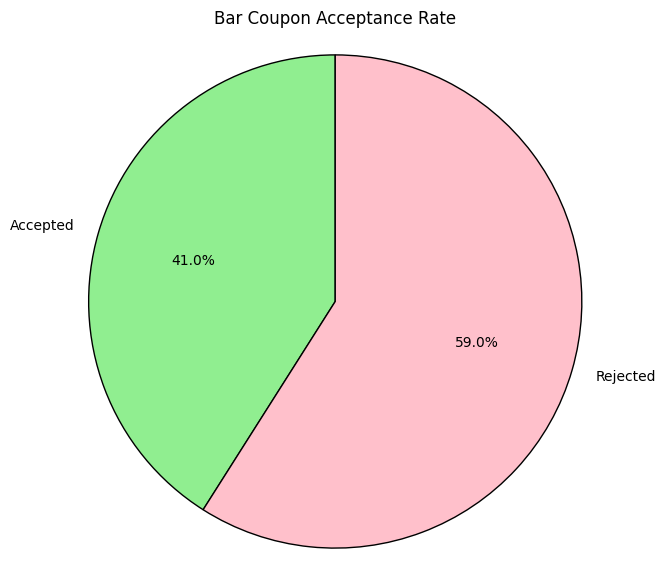

<Figure size 640x480 with 0 Axes>

In [ ]:
# Filter the data for 'Bar' coupon
bar_coupons_df = data_rev[data_rev['coupon'] == 'Bar']

# Calculate the coupon acceptance for Y=1 (accepted coupons)
coupon_accepted = (bar_coupons_df['Y'] == 1).sum()
coupon_rejected = (bar_coupons_df['Y'] == 0).sum()

# Data for the pie chart
labels = ['Accepted', 'Rejected']
sizes = [coupon_accepted, coupon_rejected]

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'pink'], wedgeprops={'edgecolor': 'black'})

# Title for the plot
plt.title('Bar Coupon Acceptance Rate')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
plt.savefig('images/Bar Coupon Acceptance Rate')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


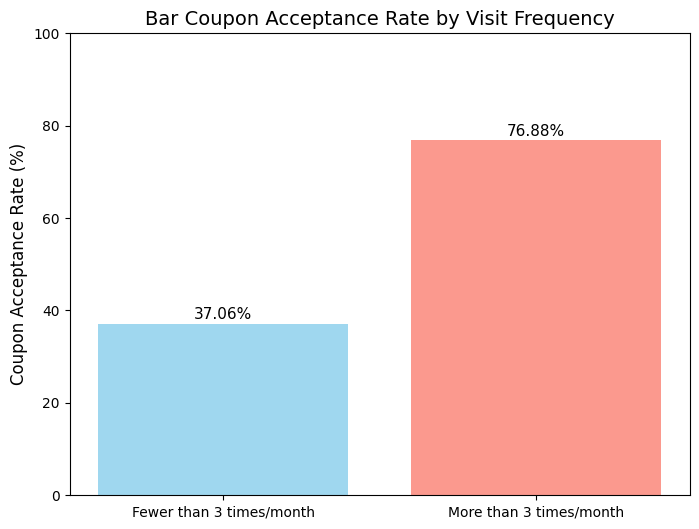

<Figure size 640x480 with 0 Axes>

In [ ]:
frequency_to_Bar = bar_coupons_df['Bar'].value_counts()
#print(frequency_to_Bar)

#calculate total numbers of customers who go to a bar fewer than 3 times a month
fewer_than_3_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]
tot_fewer_than_3 = len(fewer_than_3_df)
fewer_than_3_accepted = fewer_than_3_df[fewer_than_3_df['Y'] == 1]
num_fewer_than_3_accepted = len(fewer_than_3_accepted)
fewer_than_3_acceptance_rate = num_fewer_than_3_accepted/ tot_fewer_than_3 * 100

#calculate total numbers of customers who go to a bar more than 3 times a month
more_than_3_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]
tot_more_than_3 = len(more_than_3_df)
more_than_3_accepted = more_than_3_df[more_than_3_df['Y'] == 1]
num_more_than_3_accepted = len(more_than_3_accepted)
more_than_3_acceptance_rate = num_more_than_3_accepted / tot_more_than_3 * 100

# Data
categories = ['Fewer than 3 times/month', 'More than 3 times/month']
acceptance_rates = [fewer_than_3_acceptance_rate, more_than_3_acceptance_rate]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'salmon'], alpha=0.8)

# Add labels and title
plt.ylabel('Coupon Acceptance Rate (%)', fontsize=12)
plt.title('Bar Coupon Acceptance Rate by Visit Frequency', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit to show percentage clearly
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the values on top of the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', fontsize=11)

# Show plot
plt.show()
plt.savefig('images/Bar Coupon Acceptance Rate by Visit Frequency')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<ipython-input-351-355ffe952c2d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_1_df['age'] = pd.to_numeric(more_than_1_df['age'], errors='coerce')


The bar coupon acceptance rate for all others is 33.44%


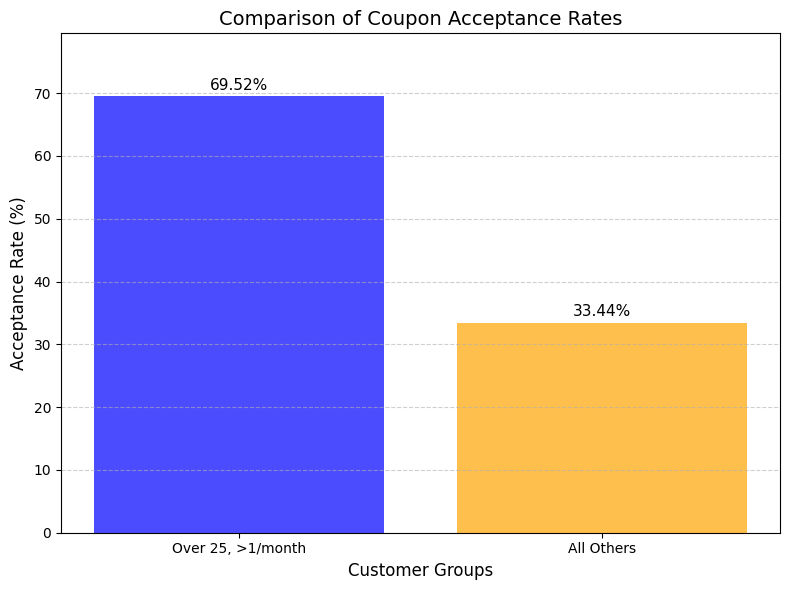

<Figure size 640x480 with 0 Axes>

In [ ]:
#to know what the frequencies are
frequency_type = bar_coupons_df['Bar'].value_counts()
#print(frequency_type)

#go to a bar more than 1 time a month
more_than_1_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])]
more_than_1_df.loc[more_than_1_df['age'] == '50plus','age'] = 50
more_than_1_df.loc[more_than_1_df['age'] == 'below21','age'] = 20
more_than_1_df['age'] = pd.to_numeric(more_than_1_df['age'], errors='coerce')
#print(more_than_1_df['age'].dtype)
over_age_25_df = more_than_1_df[more_than_1_df['age'] > 25]
over_age_25_coupon_accepted = over_age_25_df[over_age_25_df['Y'] == 1]
over_age_25_acceptance_rate = len(over_age_25_coupon_accepted) / len(over_age_25_df) *100

#go to a bar less than 1 time a month
less_than_1_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1'])]
less_than_1_df_accepted_coupon = less_than_1_df[less_than_1_df['Y'] == 1]

#go to a bar more than 1 time a month but less than the age of 25
less_than_age_25_df = more_than_1_df[more_than_1_df['age'] <= 25]
less_than_age_25_accepted_coupon = less_than_age_25_df[less_than_age_25_df['Y'] == 1]

all_others_acceptance_rate = (len(less_than_1_df_accepted_coupon) + len(less_than_age_25_accepted_coupon)) / (len(less_than_1_df) + len(less_than_age_25_df)) *100
print(f"The bar coupon acceptance rate for all others is {all_others_acceptance_rate:.2f}%")

categories = ["Over 25, >1/month", "All Others"]
acceptance_rates = [over_age_25_acceptance_rate, all_others_acceptance_rate]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['blue', 'orange'], alpha=0.7)

# Add labels, title, and grid
plt.title("Comparison of Coupon Acceptance Rates", fontsize=14)
plt.ylabel("Acceptance Rate (%)", fontsize=12)
plt.xlabel("Customer Groups", fontsize=12)
plt.ylim(0, max(acceptance_rates) + 10)  # Adjust the y-axis for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add values on top of bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 1, f"{rate:.2f}%", ha='center', fontsize=11)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('images/Comparison of Coupon Acceptance Rates')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
#data = pd.read_csv('data/coupons.csv')
#bar_coupons_df = data_rev[data_rev['coupon'] == 'Bar']

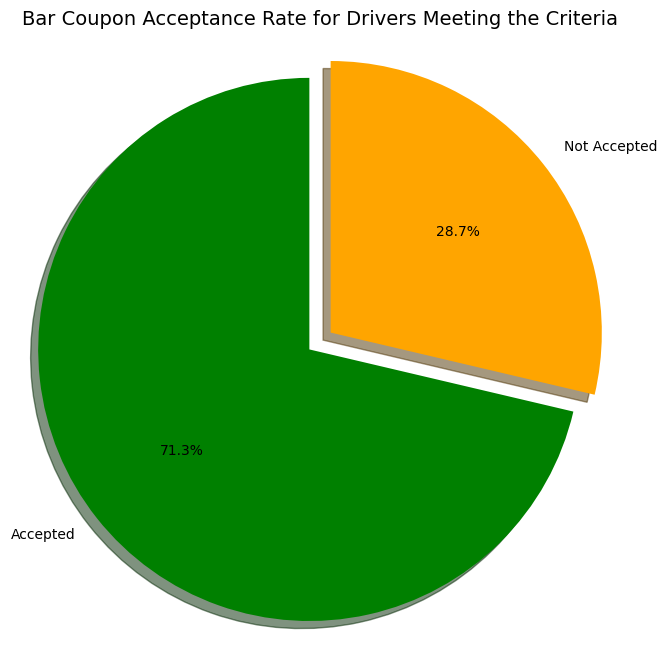

<Figure size 640x480 with 0 Axes>

In [ ]:
bar_coupons_df['passenger'].value_counts()
passenger_not_a_kid = more_than_1_df[more_than_1_df['passenger'] != 'Kid(s)']
occupation_counts = passenger_not_a_kid['occupation'].value_counts()

#exclude farming, fishing, or forestry
exclude_FFF = passenger_not_a_kid[passenger_not_a_kid['occupation'] != 'Farming Fishing & Forestry']

passenger_not_a_kid_accepted_coupon = passenger_not_a_kid[passenger_not_a_kid['Y'] == 1]
passenger_not_a_kid_acceptance_rate = len(passenger_not_a_kid_accepted_coupon)/len(passenger_not_a_kid)*100

# Data for the pie chart
labels = ['Accepted', 'Not Accepted']
passenger_not_a_kid_accepted = len(passenger_not_a_kid[passenger_not_a_kid['Y'] == 1])
passenger_not_a_kid_not_accepted = len(passenger_not_a_kid) - passenger_not_a_kid_accepted

sizes = [passenger_not_a_kid_accepted, passenger_not_a_kid_not_accepted]
colors = ['green', 'orange']  # Green for accepted, orange for not accepted
explode = (0.1, 0)  # Slightly explode the accepted slice for emphasis

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title("Bar Coupon Acceptance Rate for Drivers Meeting the Criteria", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()
plt.savefig('images/Bar Coupon Acceptance Rate for Drivers Meeting the Criteria')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



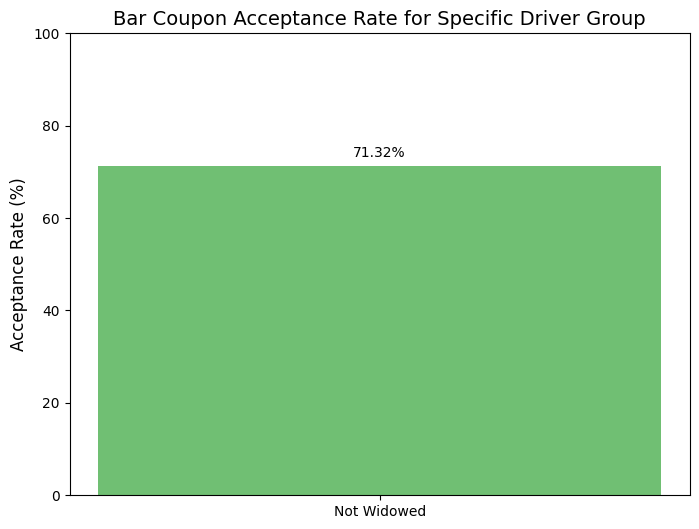

<Figure size 640x480 with 0 Axes>

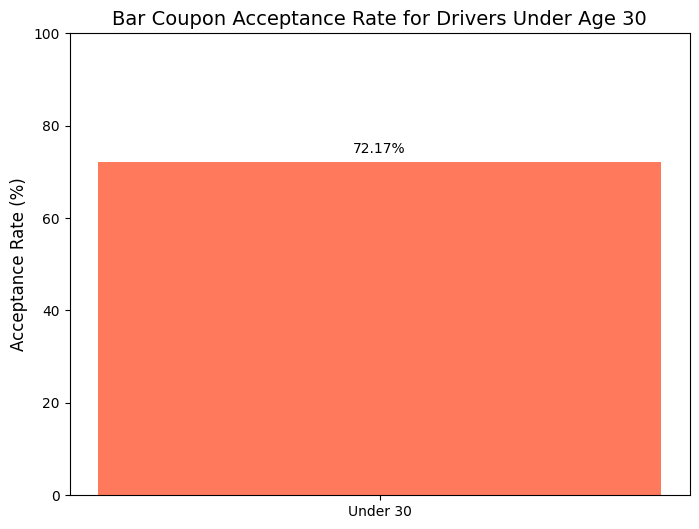

<Figure size 640x480 with 0 Axes>

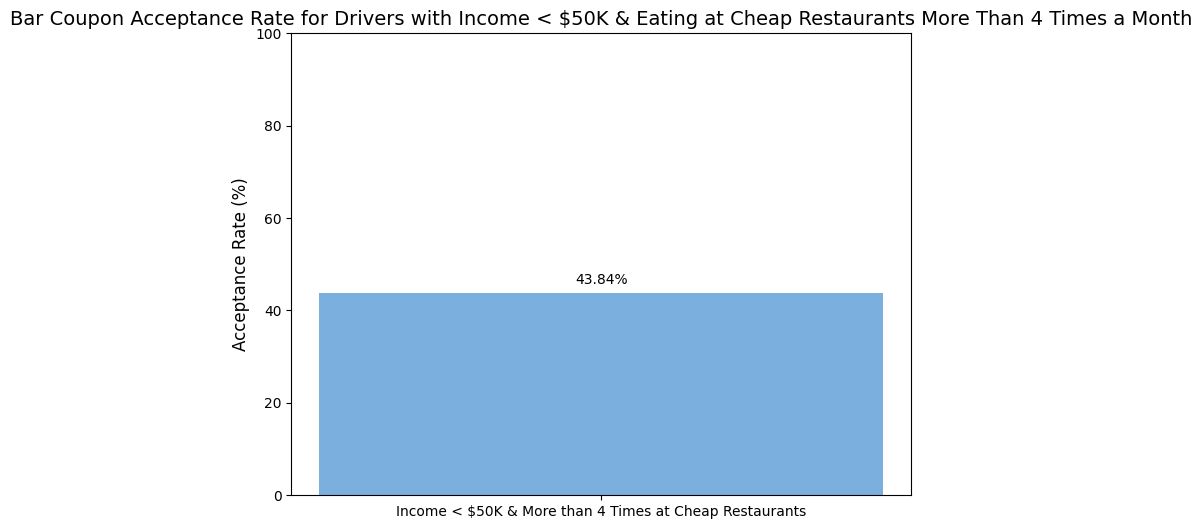

<Figure size 640x480 with 0 Axes>

In [ ]:
bar_coupons_df['maritalStatus'].value_counts()

#go to bars more than once a month, had passengers that were not a kid, and were not widowed
not_widowed = passenger_not_a_kid[passenger_not_a_kid['maritalStatus'] != 'Widowed']
not_widowed_accepted_coupon = not_widowed[not_widowed['Y'] == 1]
not_widowed_acceptance_rate = len(not_widowed_accepted_coupon) / len(not_widowed) * 100

# Prepare data for the plot
categories = ['Not Widowed']
acceptance_rates = [not_widowed_acceptance_rate]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color='#4CAF50', alpha=0.8)

# Add labels and title
plt.title("Bar Coupon Acceptance Rate for Specific Driver Group", fontsize=14)
plt.ylabel("Acceptance Rate (%)", fontsize=12)
plt.ylim(0, 100)  # Set the y-axis range to 0-100 for clarity
plt.text(0, not_widowed_acceptance_rate + 2, f"{not_widowed_acceptance_rate:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.show()
plt.savefig('images/Bar Coupon Acceptance Rate for Specific Driver Group')
#go to bars more than once a month and are under the age of 30
under_age_30 = more_than_1_df[more_than_1_df['age'] < 30]
under_age_30_accepted = under_age_30[under_age_30['Y'] == 1]
under_age_30_acceptance_rate = len(under_age_30_accepted) / len(under_age_30) *100

# Prepare data for the plot
categories = ['Under 30']
acceptance_rates = [under_age_30_acceptance_rate]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color='#FF5733', alpha=0.8)

# Add labels and title
plt.title("Bar Coupon Acceptance Rate for Drivers Under Age 30", fontsize=14)
plt.ylabel("Acceptance Rate (%)", fontsize=12)
plt.ylim(0, 100)  # Set the y-axis range to 0-100
plt.text(0, under_age_30_acceptance_rate + 2, f"{under_age_30_acceptance_rate:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.show()
plt.savefig('images/Bar Coupon Acceptance Rate for Drivers Under Age 30')

cheap_restaurants_more_than_4 = bar_coupons_df[bar_coupons_df['RestaurantLessThan20'].isin(['4~8','gt8'])]
bar_coupons_df['income'].value_counts().sort_index()

less_than_50k = cheap_restaurants_more_than_4[cheap_restaurants_more_than_4['income'].isin(['$25,000 - $49,999','Less than $12500'])]
less_than_50k_accepted = less_than_50k[less_than_50k['Y'] == 1]
less_than_50k_acceptance_rate  = len(less_than_50k_accepted) / len(less_than_50k) * 100

# Prepare data for the plot
categories = ['Income < $50K & More than 4 Times at Cheap Restaurants']
acceptance_rates = [less_than_50k_acceptance_rate]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color='#5A9BD5', alpha=0.8)

# Add labels and title
plt.title("Bar Coupon Acceptance Rate for Drivers with Income < $50K & Eating at Cheap Restaurants More Than 4 Times a Month", fontsize=14)
plt.ylabel("Acceptance Rate (%)", fontsize=12)
plt.ylim(0, 100)  # Set the y-axis range to 0-100
plt.text(0, less_than_50k_acceptance_rate + 2, f"{less_than_50k_acceptance_rate:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.show()
plt.savefig('images/Bar Coupon Acceptance Rate for Drivers with Income < $50K & Eating at Cheap Restaurants More Than 4 Times a Month')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

To plot the coupon acceptance rate among male and female for each coupon type, you can follow these steps:

Filter the data by gender (Male and Female)
Group by coupon type to calculate the acceptance rate for each type separately.
Plot the results for both males and females.

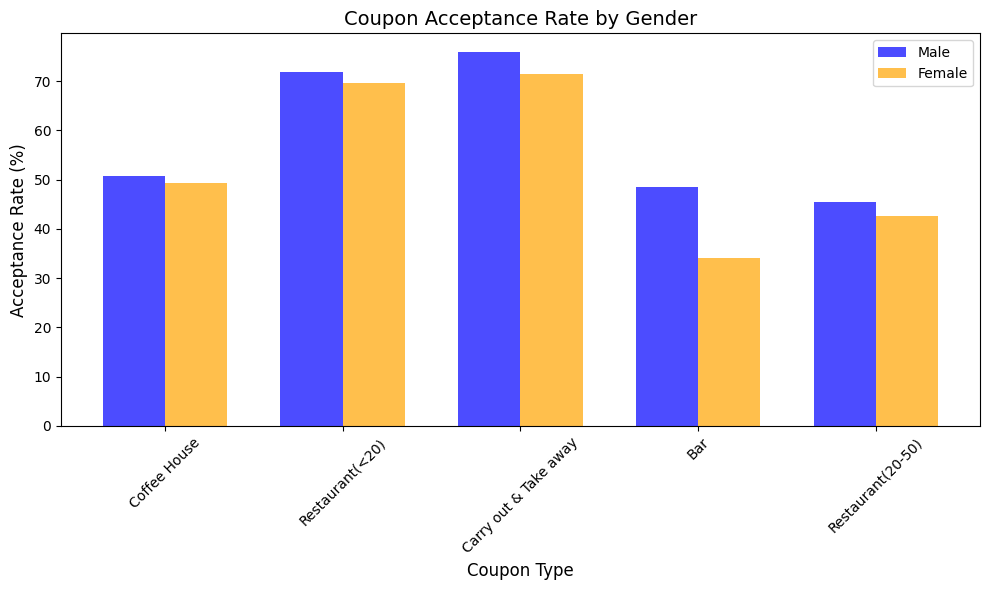

<Figure size 640x480 with 0 Axes>

In [ ]:
# Filter the data into separate groups for male and female
male_data = data_rev[data_rev['gender'] == 'Male']
female_data = data_rev[data_rev['gender'] == 'Female']

# Create a function to calculate coupon acceptance rate by gender
def calculate_acceptance_rate(df, coupon_type):
    coupon_df = df[df['coupon'] == coupon_type]
    total = len(coupon_df)
    accepted = len(coupon_df[coupon_df['Y'] == 1])
    return accepted / total * 100 if total > 0 else 0

# Define the list of coupon types
coupon_types = ['Coffee House', 'Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']

# Initialize lists to store acceptance rates for both genders
male_acceptance_rates = []
female_acceptance_rates = []

# Calculate acceptance rates for each coupon type
for coupon in coupon_types:
    male_acceptance_rate = calculate_acceptance_rate(male_data, coupon)
    female_acceptance_rate = calculate_acceptance_rate(female_data, coupon)

    male_acceptance_rates.append(male_acceptance_rate)
    female_acceptance_rates.append(female_acceptance_rate)

# Plot the data
x = range(len(coupon_types))

plt.figure(figsize=(10, 6))
bar_width = 0.35
plt.bar(x, male_acceptance_rates, bar_width, label='Male', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in x], female_acceptance_rates, bar_width, label='Female', color='orange', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.title('Coupon Acceptance Rate by Gender', fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], coupon_types, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('images/Coupon Acceptance Rate by Gender')

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  